### Fraud Case 3: An increase in claim volume
Rapid invoice volume increases may indicate that fraudster has become more confident in stealing money. One way to identify this type of fraud is to calculate the percentage of increase in claims compared to first month. For example, if a person submitted 5 claims in the first month and 25 in another, the percentage of increase compared to the first month is 400%. To explore the data set for any fraud of this nature, write a program that
- finds a list of unique claimants (`uploader` column)
- loops through the list of unique claimants and for each claimant
   * finds all the submitted claims
   * find all the months in which claimant made a claim
   * loop through the months and count the number of claims per month
   * calculate the percentage of increase compared to the first month
   * checks if the percentage of increase in claim volume is larger than a threshold (let’s assume 500%) in any month
   * prints a message for further investigation if the percentage of increase is above the threshold
   * visualizes the percentage of increase by month for the suspicious claimants

In [1]:
# importing data
import pandas as pd
data = pd.read_csv('assignment-data.csv')

# importing validation and tweet function
from ipynb.fs.full.utilities import tweet
from ipynb.fs.full.utilities import validate

# importing and setting up visulatization packages
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= 12,5
plt.rcParams.update({'font.size': 16})

Possible fraud case! Inverstigate! Uploader:  Lex Luthor


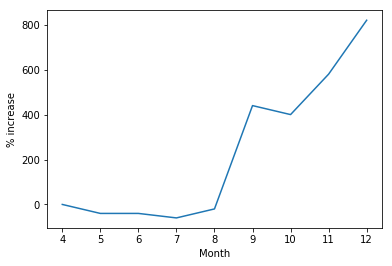

In [2]:
# Create a new column called transaction_month and assign the month of transaction to each claim
# HINT: Refer to item 5 in the cheat sheet
data['transaction_month'] = pd.to_datetime(data['transaction_date']).dt.month

# Find a list of unique claimants
# HINT: Refer to item 3 in the cheat sheet
uploaders = data["uploader"].unique()

# Loop through the list of unique claimants using a for loop
# HINT: Refer to item 10 in the cheat sheet
for uploader in uploaders:
    
    # Create a new dataframe with two colomns, month and count and call it uploader_data
    # We will be storing the number of claims for each month in this dataframe
    # HINT: Refer to item 1 in the cheat sheet
    uploader_data = pd.DataFrame(columns = ['month', 'count'])
    
    # Find all the claims submitted by the claimant and store it in a new dataframe
    # HINT: Refer to item 8 in the cheat sheet
    filter = data.uploader == uploader
    uploader_claims = data[filter]

    # Find all the month in which claimant has a claim
    # HINT: Refer to item 3 in the cheat sheet
    uploader_months = uploader_claims['transaction_month'].unique()

    # Loop through the list of month
    # HINT: Refer to item 10 in the cheat sheet
    for month in uploader_months:
        
        # Find all the uploader's claims in each month
        # HINT: Refer to item 8 in the cheat sheet
        filter = uploader_claims.transaction_month == month
        claims_in_month = uploader_claims[filter]
        
        # Calculate the total number of uploader's claims in the month
        # HINT: Refer to item 12 in the cheat sheet
        count = len(claims_in_month)

        # Add a new row to uploader_date dataframe with the uploader name and the total number of uploader claims in the month
        # HINT: Refer to item 2 in the cheat sheet
        uploader_data = uploader_data.append({'month': month, 'count': count}, ignore_index = True)
    
    # Add a new column to the uploader_data dataframe 
    # and store the percentage of the increase compared to the first month in this column
    # HINT: Refer to item 7 in the cheat sheet
    first_month_count = uploader_data['count'][0]
    uploader_data["percentage"] = (uploader_data['count'] - first_month_count) / first_month_count * 100

    # Filter uploader_date and find the month in which the percentage of increase
    # in claim volums is higher than 500% and store it in filtered_high_percentage
    # HINT: Refer to item 8 in the cheat sheet
    filter = uploader_data.percentage >= 500
    filtered_high_percentage = uploader_data[filter]
    
    # If the length of filtered_high_percentage is larger than one, then
    # HINT: Refer to item 13 in the cheat sheet
    if len(filtered_high_percentage) > 0:
        # 1) print a message with the name of the uploader
        print('Possible fraud case! Inverstigate! Uploader: ', uploader)
        # 2) create a visulization using the month and percentage columns in uploader_data
        # HINT: Refer to item 17 in the cheat sheet
        plt.xlabel('Month')
        plt.ylabel('% increase')
        plt.plot(uploader_data['month'], uploader_data['percentage'])
        # Note: to save your data visualization into a png file, uncomment the following line
#         plt.savefig('case3_visualization.png')
        

In [3]:
# Assign the name of the claimant with the a high increase in the claim volume to fraudster_name
fraudster_name = 'Lex Luthor'
validate('FraudCase3', fraudster_name)

Yay! You got it!
